In [1]:
import pypylon.pylon as py

In [2]:
from pypylon import pylon

In [3]:
camera_serials = [24535665, 24548223]

In [4]:
NUM_CAMERAS = 2

In [5]:
tlf = py.TlFactory.GetInstance()

In [6]:
tlf

<pypylon.pylon.TlFactory; proxy of <Swig Object of type 'Pylon::CTlFactory *' at 0x7fd788066100> >

In [7]:
# create a device filter for Pylon CamEmu devices
di = py.DeviceInfo()

In [8]:
di

<pypylon.pylon.DeviceInfo; proxy of <Swig Object of type 'Pylon::CDeviceInfo *' at 0x7fd788066520> >

In [9]:
devs = tlf.EnumerateDevices([di,])

In [10]:
devs

(<pypylon.pylon.DeviceInfo; proxy of <Swig Object of type 'Pylon::CDeviceInfo *' at 0x7fd788066d00> >,
 <pypylon.pylon.DeviceInfo; proxy of <Swig Object of type 'Pylon::CDeviceInfo *' at 0x7fd788066d30> >)

In [11]:
devs[0].GetSerialNumber()

'24535665'

In [12]:
cam_array = py.InstantCameraArray(NUM_CAMERAS)

In [13]:
for idx, cam in enumerate(cam_array):
    cam.Attach(tlf.CreateDevice(devs[idx]))

In [14]:
cam_array.Open()

In [15]:
# store a unique number for each camera to identify the incoming images
for idx, cam in enumerate(cam_array):
    camera_serial = cam.DeviceInfo.GetSerialNumber()
    print(f"set context {idx} for camera {camera_serial}")
    cam.SetCameraContext(idx)

set context 0 for camera 24535665
set context 1 for camera 24548223


In [16]:
# set the exposure time for each camera
for idx, cam in enumerate(cam_array):
    camera_serial = cam.DeviceInfo.GetSerialNumber()
    print(f"set Exposuretime {idx} for camera {camera_serial}")
    #cam.ExposureTimeRaw = 10000

set Exposuretime 0 for camera 24535665
set Exposuretime 1 for camera 24548223


In [17]:
# set the exposure time for each camera
for idx, cam in enumerate(cam_array):
    cam.UserSetSelector = "Default"
    cam.UserSetLoad.Execute()

In [18]:
# wait for all cameras to grab 10 frames
frames_to_grab = 5
# store last framecount in array
frame_counts = [0]*NUM_CAMERAS

In [19]:
images = []
cam_array.StartGrabbing()
while True:
    grabResult = cam_array.RetrieveResult(5000, pylon.TimeoutHandling_ThrowException)
    if grabResult.GrabSucceeded():
        img_nr = grabResult.ImageNumber
        cam_id = grabResult.GetCameraContext()
        frame_counts[cam_id] = img_nr
        print(f"cam #{cam_id}  image #{img_nr}")

        # do something with the image ....
        # Access the image data.
        print("SizeX: ", grabResult.Width)
        print("SizeY: ", grabResult.Height)
        img = grabResult.Array
        print("Gray value of first pixel: ", img[0, 0])
        images.append(img)
        
        # check if all cameras have reached 100 images
        if min(frame_counts) >= frames_to_grab:
            print( f"all cameras have acquired {frames_to_grab} frames")
            break
                
    grabResult.Release()
cam_array.StopGrabbing()

cam #0  image #1
SizeX:  1280
SizeY:  1024
Gray value of first pixel:  4
cam #0  image #2
SizeX:  1280
SizeY:  1024
Gray value of first pixel:  4
cam #0  image #3
SizeX:  1280
SizeY:  1024
Gray value of first pixel:  4
cam #1  image #1
SizeX:  1280
SizeY:  1024
Gray value of first pixel:  4
cam #0  image #4
SizeX:  1280
SizeY:  1024
Gray value of first pixel:  4
cam #1  image #2
SizeX:  1280
SizeY:  1024
Gray value of first pixel:  3
cam #0  image #5
SizeX:  1280
SizeY:  1024
Gray value of first pixel:  4
cam #1  image #3
SizeX:  1280
SizeY:  1024
Gray value of first pixel:  3
cam #0  image #6
SizeX:  1280
SizeY:  1024
Gray value of first pixel:  4
cam #1  image #4
SizeX:  1280
SizeY:  1024
Gray value of first pixel:  3
cam #0  image #7
SizeX:  1280
SizeY:  1024
Gray value of first pixel:  4
cam #1  image #5
SizeX:  1280
SizeY:  1024
Gray value of first pixel:  4
all cameras have acquired 5 frames


In [20]:
cam_array.Close()

In [21]:
import matplotlib.pyplot as plt

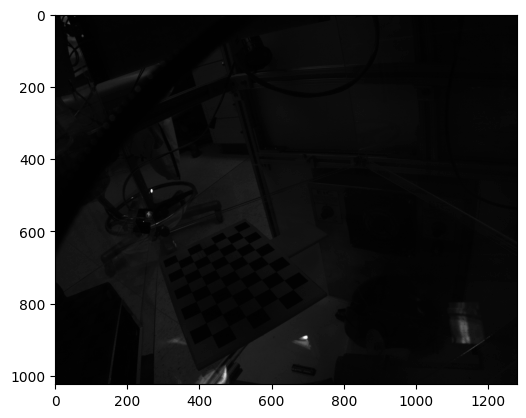

In [22]:
plt.imshow(images[0], cmap = plt.cm.Greys_r)

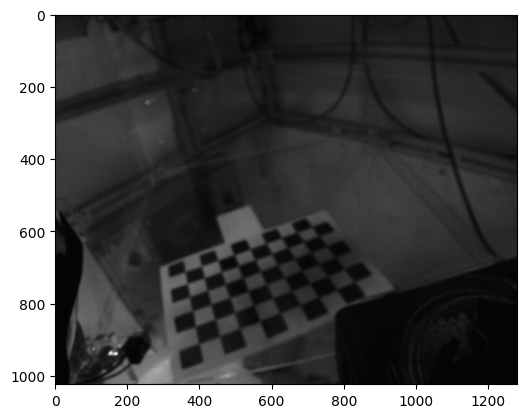

In [23]:
plt.imshow(images[3], cmap = plt.cm.Greys_r)